<a href="https://colab.research.google.com/github/RebeccaKessler/Machine_Learning/blob/main/Codes/Basic_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [49]:
df_training_data = pd.read_csv('https://raw.githubusercontent.com/RebeccaKessler/Machine_Learning/main/training_data.csv')
df_unlabelled_test_data = pd.read_csv('https://raw.githubusercontent.com/RebeccaKessler/Machine_Learning/main/unlabelled_test_data.csv')

In [50]:
df_training_data.head(5)

,id,sentence,difficulty
0,0,Les coûts kilométriques réels peuvent diverger...,C1
1,1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1
2,2,Le test de niveau en français est sur le site ...,A1
3,3,Est-ce que ton mari est aussi de Boston?,A1
4,4,"Dans les écoles de commerce, dans les couloirs...",B1


In [51]:
df_unlabelled_test_data.head()

,id,sentence
0,0,Nous dûmes nous excuser des propos que nous eû...
1,1,Vous ne pouvez pas savoir le plaisir que j'ai ...
2,2,"Et, paradoxalement, boire froid n'est pas la b..."
3,3,"Ce n'est pas étonnant, car c'est une saison my..."
4,4,"Le corps de Golo lui-même, d'une essence aussi..."


# Logistic Regresssion

## Train on the 80% of training data, test on 20% of training data

In [52]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Select the feature x and the target variable y
x = df_training_data['sentence']
y = df_training_data['difficulty']

# Split the training dataset into train set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

# Text preprocessing using TfidfVectorizer to convert the data into TF-IDF features
vectorizer = TfidfVectorizer(ngram_range=(1, 1)) # consider only single words (unigrams)
x_train_tfidf = vectorizer.fit_transform(x_train) # fit vectorizer on + transfrom train data
x_test_tfidf = vectorizer.transform(x_test) # transform test data

In [53]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
model_LR = LogisticRegression()
model_LR.fit(x_train_tfidf, y_train)

# Make predictions on the test data with the trained model
LR_pred = model_LR.predict(x_test_tfidf)

df_pred_LR = pd.DataFrame({'id': x_test.index, 'difficulty': LR_pred})
df_pred_LR

,id,difficulty
0,596,A1
1,3370,B2
2,3048,C2
3,2908,B2
4,8,B1
...,...,...
955,2968,A1
956,198,C2
957,2422,C2
958,1485,C2


In [54]:
# Accuracy, Precision, Recall, F1-score with 'macro' average for simplicity
accuracy_LR_split = accuracy_score(y_test, LR_pred)
precision_LR_split = precision_score(y_test, LR_pred, average='macro')
recall_LR_split = recall_score(y_test, LR_pred, average='macro')
f1_LR_split = f1_score(y_test, LR_pred, average='macro')

# Visualize all results in a dataframe
LR_scores = pd.DataFrame([accuracy_LR_split, precision_LR_split, recall_LR_split, f1_LR_split], index=['Accuracy', 'Precision', 'Recall', 'F1 score'], columns=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'])
print("Scores of the Logistic Regression model for split train-test dataset:")
LR_scores

Accuracy of the Logistic Regression model for split train-test dataset: 0.4510416666666667
Precision: 0.4430568824239849
Recall: 0.44891713613020245
F1-score: 0.44179800840501277


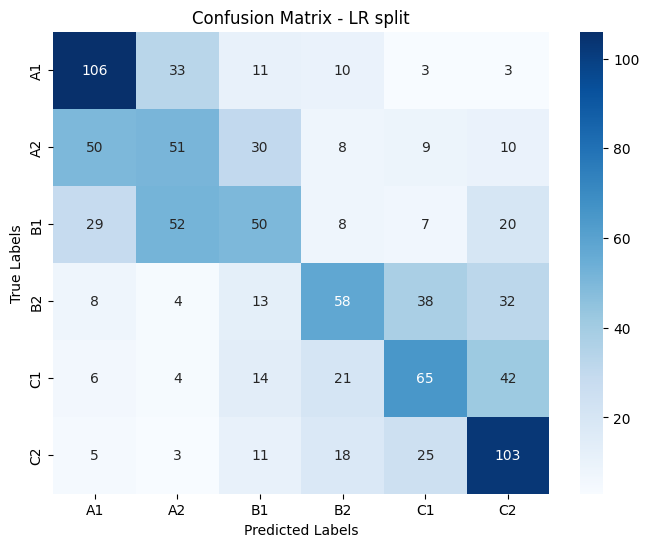

In [55]:
cm_LR_split = confusion_matrix(y_test, LR_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_LR_split, annot=True, fmt='d', cmap='Blues', xticklabels=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'], yticklabels=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - LR split')
plt.show()

In [56]:
# Accuracy, Precision, Recall, F1-score for each class

TP_LR_split = np.diag(cm_LR_split) # True positives for each class
tot_LR_split = cm_LR_split.sum(axis=1) # Total samples for each class

indiv_LR_accuracy = TP_LR_split / tot_LR_split # Accuracy for each class
indiv_LR_precision = precision_score(y_test, LR_pred, average = None)
indiv_LR_recall = recall_score(y_test, LR_pred, average = None)
indiv_LR_f1 = f1_score(y_test, LR_pred, average = None)

# Visualize all results in a dataframe
indiv_LR_scores = pd.DataFrame([indiv_LR_accuracy, indiv_LR_precision, indiv_LR_recall, indiv_LR_f1], index=['Accuracy', 'Precision', 'Recall', 'F1 score'], columns=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'])
print("Scores for each class of the Logistic Regression model for split train-test dataset:")
indiv_LR_scores

,A1,A2,B1,B2,C1,C2
Accuracy,0.638554,0.322785,0.301205,0.379085,0.427632,0.624242
Precision,0.519608,0.346939,0.387597,0.471545,0.442177,0.490476
Recall,0.638554,0.322785,0.301205,0.379085,0.427632,0.624242
F1 score,0.572973,0.334426,0.338983,0.420290,0.434783,0.549333


In [ ]:
from sklearn.model_selection import GridSearchCV

# Find the optimal parameters with hyperparameter tuning

# Define the parameters to test
param_grid_LR = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'class_weight': [None, 'balanced'],
    'max_iter': [100, 200, 500],
    'tol': [1e-4, 1e-5]
}

# Initialize the Logistic Regression model, perform grid search, fit the model
model_LR_cv = LogisticRegression()
LR_cv = GridSearchCV(model_LR_cv, param_grid_LR, cv=5)
LR_cv.fit(x_train_tfidf, y_train)

# Get the best parameters
best_param_LR = LR_cv.best_params_
print('The best parameters are:', best_param_LR)

# Initialize and train the Logistic Regression model
model_LR_best = LogisticRegression()
model_LR_best.fit(x_train_tfidf, y_train)

# Make predictions on the test data with the trained model
LR_pred_best = model_LR_best.predict(x_test_tfidf)

df_pred_LR_best = pd.DataFrame({'id': x_test.index, 'difficulty': LR_pred_best})
df_pred_LR_best

accuracy_LR_split_best = accuracy_score(y_test, LR_pred_best)
print("Accuracy of the Logistic Regression model with the best parameters, for split train-test dataset:", accuracy_LR_split_best)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

## Train on the full training data, test on the unlabelled test data

In [57]:
# Select the feature x and the target variable y
x = df_training_data['sentence']
y = df_training_data['difficulty']

# Define the test data
x_test_unlabelled = df_unlabelled_test_data['sentence']

# Text preprocessing using TfidfVectorizer to convert the data into TF-IDF features
x_full_tfidf = vectorizer.fit_transform(x) # fit vectorizer on + transfrom train data
x_test_unlabelled_tfidf = vectorizer.transform(x_test_unlabelled) # transform test data


In [58]:
# Initialize and train the Logistic Regression model on the whole dataset
model_LR = LogisticRegression()
model_LR.fit(x_full_tfidf, y)

# Make predictions on the test data with the trained model
LR_pred_full = model_LR.predict(x_test_unlabelled_tfidf)

df_pred_LR_full = pd.DataFrame({'id': x_test_unlabelled.index, 'difficulty': LR_pred_full})
df_pred_LR_full

,id,difficulty
0,0,C2
1,1,A2
2,2,A1
3,3,A1
4,4,C2
...,...,...
1195,1195,B1
1196,1196,A2
1197,1197,C2
1198,1198,C1


In [59]:
# Export the dataframe as csv
df_pred_LR_full.to_csv("submission_LR.csv", index=False)

# KNN

## Split train-test dataset

In [60]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and fit the kNN classifier
model_kNN = KNeighborsClassifier()

model_kNN.fit(x_train_tfidf, y_train)

# Make predictions on the test data
kNN_pred = model_kNN.predict(x_test_tfidf)

df_pred_kNN = pd.DataFrame({'id': x_test.index, 'difficulty': kNN_pred})
df_pred_kNN

,id,difficulty
0,596,A1
1,3370,A1
2,3048,C2
3,2908,A2
4,8,A1
...,...,...
955,2968,A1
956,198,C2
957,2422,B2
958,1485,B1


In [61]:
# Get the accuracy
accuracy_kNN_split = accuracy_score(y_test, kNN_pred)
print("Accuracy of the kNN classifier for split train-test dataset:", accuracy_kNN_split)

# Calculate Precision, Recall, F1-score with 'macro' average for simplicity
precision_kNN_split = precision_score(y_test, kNN_pred, average='macro')
print("Precision:", precision_kNN_split)

recall_kNN_split = recall_score(y_test, kNN_pred, average='macro')
print("Recall:", recall_kNN_split)

f1_kNN_split = f1_score(y_test, kNN_pred, average='macro')
print("F1-score:", f1_kNN_split)

Accuracy of the kNN classifier for split train-test dataset: 0.31875
Precision: 0.39261320062951693
Recall: 0.31508803435601235
F1-score: 0.2942316023265181


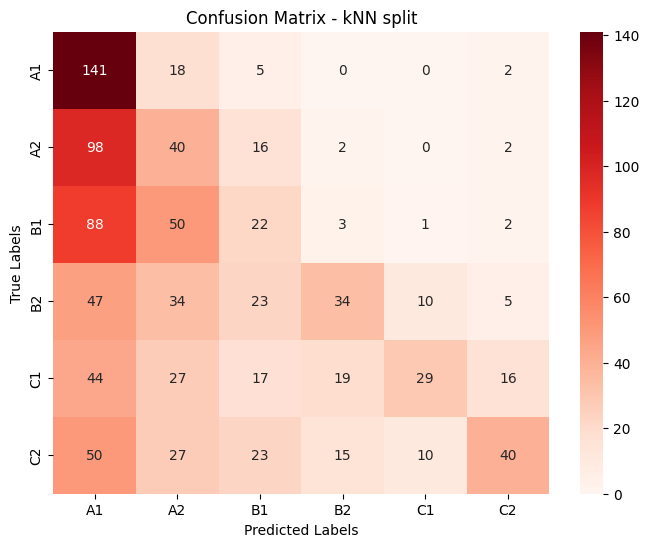

In [97]:
cm_kNN_split = confusion_matrix(y_test, kNN_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_kNN_split, annot=True, fmt='d', cmap='Reds', xticklabels=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'], yticklabels=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - kNN split')
plt.show()

In [63]:
# Accuracy for each class
TP_kNN_split = np.diag(cm_kNN_split) # True positives for each class

tot_kNN_split = cm_kNN_split.sum(axis=1) # Total samples for each class

indiv_kNN_accuracy = TP_kNN_split / tot_kNN_split # Accuracy for each class

# Precision of each class
indiv_kNN_precision = precision_score(y_test, kNN_pred, average = None)

# Recall of each class
indiv_kNN_recall = recall_score(y_test, kNN_pred, average = None)

# F1 score of each class
indiv_kNN_f1 = f1_score(y_test, kNN_pred, average = None)

# Visualize all results in a dataframe
kNN_scores = pd.DataFrame([indiv_kNN_accuracy, indiv_kNN_precision, indiv_kNN_recall, indiv_kNN_f1], index=['Accuracy', 'Precision', 'Recall', 'F1 score'], columns=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'])
kNN_scores

,A1,A2,B1,B2,C1,C2
Accuracy,0.849398,0.253165,0.132530,0.222222,0.190789,0.242424
Precision,0.301282,0.204082,0.207547,0.465753,0.580000,0.597015
Recall,0.849398,0.253165,0.132530,0.222222,0.190789,0.242424
F1 score,0.444795,0.225989,0.161765,0.300885,0.287129,0.344828


In [64]:
# Loop over the model parameters to find the optimal parameters (for the best accuracy)
n_neighbors = [1,3,5,7]
p_values = [1,2] # 1) Manhattan distance 2) Euclidian distance
weights = ['uniform', 'distance']

for w in weights:
    for p in p_values:
        for n in n_neighbors:
            model = KNeighborsClassifier(n_neighbors=n, p=p, weights=w)
            model.fit(x_train_tfidf, y_train)
            accuracy_kNN = model.score(x_test_tfidf, y_test)
            print(f"Accuracy of kNN classifier for k = {n}, p = {p}, weight = {w}: {accuracy_kNN}")

Accuracy of kNN classifier for k = 1, p = 1, weight = uniform: 0.22291666666666668
Accuracy of kNN classifier for k = 3, p = 1, weight = uniform: 0.175
Accuracy of kNN classifier for k = 5, p = 1, weight = uniform: 0.17395833333333333
Accuracy of kNN classifier for k = 7, p = 1, weight = uniform: 0.17291666666666666
Accuracy of kNN classifier for k = 1, p = 2, weight = uniform: 0.37916666666666665
Accuracy of kNN classifier for k = 3, p = 2, weight = uniform: 0.290625
Accuracy of kNN classifier for k = 5, p = 2, weight = uniform: 0.31875
Accuracy of kNN classifier for k = 7, p = 2, weight = uniform: 0.31145833333333334
Accuracy of kNN classifier for k = 1, p = 1, weight = distance: 0.22291666666666668
Accuracy of kNN classifier for k = 3, p = 1, weight = distance: 0.17083333333333334
Accuracy of kNN classifier for k = 5, p = 1, weight = distance: 0.171875
Accuracy of kNN classifier for k = 7, p = 1, weight = distance: 0.17395833333333333
Accuracy of kNN classifier for k = 1, p = 2, wei

In [65]:
from sklearn.model_selection import GridSearchCV

# Find the optimal parameters with hyperparameter tuning

# Define the parameters to test
param_grid_kNN = {'n_neighbors':np.arange(1,10), 'p':np.arange(1,2), 'weights':['uniform','distance']}

# Initialize the kNN classifier, perform grid search, fit the model
model_kNN_cv = KNeighborsClassifier()
kNN_cv = GridSearchCV(model_kNN_cv, param_grid_kNN, cv=5)
kNN_cv.fit(x_train_tfidf, y_train)

# Get the best parameters
best_param_kNN = kNN_cv.best_params_
print('The best parameters are:', best_param_kNN)


The best parameters are: {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}


In [66]:
# Initialize and train the kNN classifier with the best parameters
model_kNN_best = KNeighborsClassifier(n_neighbors=1, p=2, weights='distance')

model_kNN_best.fit(x_train_tfidf, y_train)

# Make predictions on the test data
kNN_pred_best = model_kNN_best.predict(x_test_tfidf)

df_pred_kNN_best = pd.DataFrame({'id': x_test.index, 'difficulty': kNN_pred_best})
df_pred_kNN_best

,id,difficulty
0,596,A1
1,3370,A1
2,3048,A2
3,2908,C1
4,8,A2
...,...,...
955,2968,A1
956,198,C2
957,2422,A2
958,1485,B1


In [67]:
# Get the accuracy
accuracy_kNN_split_best = accuracy_score(y_test, kNN_pred_best)
print("Accuracy of the kNN model with the best parameters, for split train-test dataset:", accuracy_kNN_split_best)

# Calculate Precision, Recall, F1-score with 'macro' average for simplicity
precision_kNN_split_best = precision_score(y_test, kNN_pred_best, average='macro')
print("Precision:", precision_kNN_split_best)

recall_kNN_split_best = recall_score(y_test, kNN_pred_best, average='macro')
print("Recall:", recall_kNN_split_best)

f1_kNN_split_best = f1_score(y_test, kNN_pred_best, average='macro')
print("F1-score:", f1_kNN_split_best)

Accuracy of the kNN model with the best parameters, for split train-test dataset: 0.37916666666666665
Precision: 0.42908643577785316
Recall: 0.3761892104621922
F1-score: 0.3688831492728452


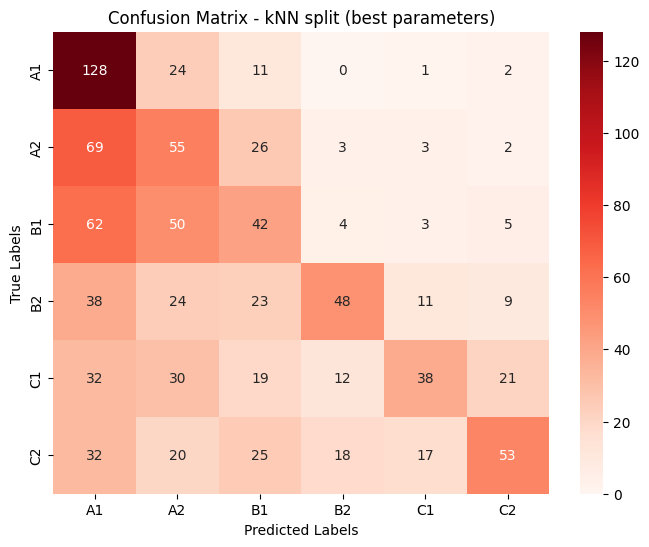

In [98]:
cm_kNN_split_best = confusion_matrix(y_test, kNN_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_kNN_split_best, annot=True, fmt='d', cmap='Reds', xticklabels=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'], yticklabels=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - kNN split (best parameters)')
plt.show()

In [69]:
# Accuracy for each class
TP_kNN_split_best = np.diag(cm_kNN_split_best) # True positives for each class

tot_kNN_split_best = cm_kNN_split_best.sum(axis=1) # Total samples for each class

indiv_kNN_accuracy_best = TP_kNN_split_best / tot_kNN_split_best # Accuracy for each class

# Precision of each class
indiv_kNN_precision_best = precision_score(y_test, kNN_pred_best, average = None)

# Recall of each class
indiv_kNN_recall_best = recall_score(y_test, kNN_pred_best, average = None)

# F1 score of each class
indiv_kNN_f1_best = f1_score(y_test, kNN_pred_best, average = None)

# Visualize all results in a dataframe
kNN_scores_best = pd.DataFrame([indiv_kNN_accuracy_best, indiv_kNN_precision_best, indiv_kNN_recall_best, indiv_kNN_f1_best], index=['Accuracy', 'Precision', 'Recall', 'F1 score'], columns=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'])
kNN_scores_best

,A1,A2,B1,B2,C1,C2
Accuracy,0.771084,0.348101,0.253012,0.313725,0.250000,0.321212
Precision,0.354571,0.270936,0.287671,0.564706,0.520548,0.576087
Recall,0.771084,0.348101,0.253012,0.313725,0.250000,0.321212
F1 score,0.485769,0.304709,0.269231,0.403361,0.337778,0.412451


## Full dataset

In [70]:
# Initialize and fit the kNN classifier on the whole dataset
model_kNN = KNeighborsClassifier(n_neighbors=1, p=2, weights='distance')

model_kNN.fit(x_full_tfidf, y)

# Make predictions on the test data
kNN_pred_full = model_kNN.predict(x_test_unlabelled_tfidf)

df_pred_kNN_full = pd.DataFrame({'id': x_test_unlabelled.index, 'difficulty': kNN_pred_full})
df_pred_kNN_full

,id,difficulty
0,0,C2
1,1,B1
2,2,A1
3,3,A2
4,4,C2
...,...,...
1195,1195,A2
1196,1196,A1
1197,1197,C2
1198,1198,C1


In [71]:
# Export the dataframe as csv
df_pred_kNN_full.to_csv("submission_kNN.csv", index=False)

# Decision Tree

## Split train-test dataset

In [72]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and fit the Decision Tree model
model_DT = DecisionTreeClassifier()

model_DT.fit(x_train_tfidf, y_train)

# Make predictions on the test data
DT_pred = model_DT.predict(x_test_tfidf)

df_pred_DT = pd.DataFrame({'id': x_test.index, 'difficulty': DT_pred})
df_pred_DT

,id,difficulty
0,596,A1
1,3370,B2
2,3048,B2
3,2908,B2
4,8,A1
...,...,...
955,2968,A1
956,198,A1
957,2422,B1
958,1485,A1


In [73]:
# Get the accuracy
accuracy_DT_split = accuracy_score(y_test, DT_pred)
print("Accuracy of the Decision Tree model for split train-test dataset:", accuracy_DT_split)

# Calculate Precision, Recall, F1-score with 'macro' average for simplicity
precision_DT_split = precision_score(y_test, DT_pred, average='macro')
print("Precision:", precision_DT_split)

recall_DT_split = recall_score(y_test, DT_pred, average='macro')
print("Recall:", recall_DT_split)

f1_DT_split = f1_score(y_test, DT_pred, average='macro')
print("F1-score:", f1_DT_split)

Accuracy of the Decision Tree model for split train-test dataset: 0.28958333333333336
Precision: 0.2843729258451126
Recall: 0.2880265995366087
F1-score: 0.28309337537155826


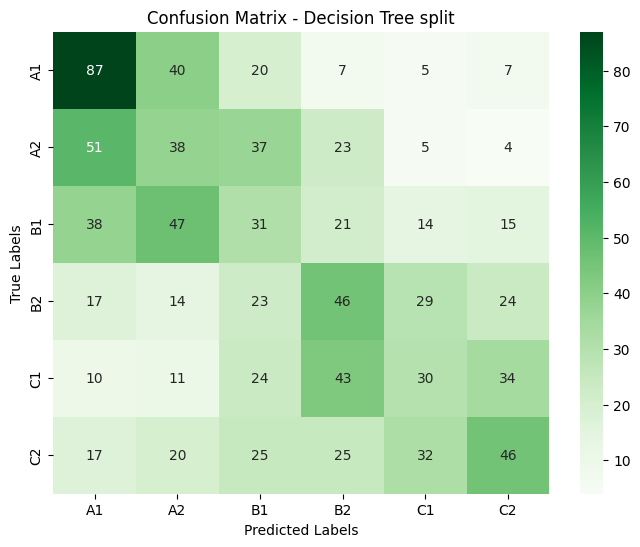

In [99]:
cm_DT_split = confusion_matrix(y_test, DT_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_DT_split, annot=True, fmt='d', cmap='Greens', xticklabels=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'], yticklabels=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Decision Tree split')
plt.show()

In [75]:
# Accuracy for each class
TP_DT_split = np.diag(cm_DT_split) # True positives for each class

tot_DT_split = cm_DT_split.sum(axis=1) # Total samples for each class

indiv_DT_accuracy = TP_DT_split / tot_DT_split # Accuracy for each class

# Precision of each class
indiv_DT_precision = precision_score(y_test, DT_pred, average = None)

# Recall of each class
indiv_DT_recall = recall_score(y_test, DT_pred, average = None)

# F1 score of each class
indiv_DT_f1 = f1_score(y_test, DT_pred, average = None)

# Visualize all results in a dataframe
DT_scores = pd.DataFrame([indiv_DT_accuracy, indiv_DT_precision, indiv_DT_recall, indiv_DT_f1], index=['Accuracy', 'Precision', 'Recall', 'F1 score'], columns=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'])
DT_scores

,A1,A2,B1,B2,C1,C2
Accuracy,0.524096,0.240506,0.186747,0.300654,0.197368,0.278788
Precision,0.395455,0.223529,0.193750,0.278788,0.260870,0.353846
Recall,0.524096,0.240506,0.186747,0.300654,0.197368,0.278788
F1 score,0.450777,0.231707,0.190184,0.289308,0.224719,0.311864


In [76]:
# Loop over the model parameters to find the optimal parameters (for the best accuracy)
criterion = ['gini', 'entropy']
max_depth = [1,2,3,4,5]

for d in max_depth:
    for c in criterion:
            model = DecisionTreeClassifier(criterion=c, max_depth=d)
            model.fit(x_train_tfidf, y_train)
            accuracy_DT = model.score(x_test_tfidf, y_test)
            print(f"Accuracy of Decision Tree model for criterion = {c}, max_depth = {d}: {accuracy_DT}")

Accuracy of Decision Tree model for criterion = gini, max_depth = 1: 0.25729166666666664
Accuracy of Decision Tree model for criterion = entropy, max_depth = 1: 0.25729166666666664
Accuracy of Decision Tree model for criterion = gini, max_depth = 2: 0.26666666666666666
Accuracy of Decision Tree model for criterion = entropy, max_depth = 2: 0.24166666666666667
Accuracy of Decision Tree model for criterion = gini, max_depth = 3: 0.2875
Accuracy of Decision Tree model for criterion = entropy, max_depth = 3: 0.29270833333333335
Accuracy of Decision Tree model for criterion = gini, max_depth = 4: 0.28020833333333334
Accuracy of Decision Tree model for criterion = entropy, max_depth = 4: 0.284375
Accuracy of Decision Tree model for criterion = gini, max_depth = 5: 0.29270833333333335
Accuracy of Decision Tree model for criterion = entropy, max_depth = 5: 0.29583333333333334


In [77]:
# Find the optimal parameters with hyperparameter tuning

# Define the parameters to test
param_grid_DT = {'criterion':['gini','entropy'], 'max_depth':np.arange(1,5)}

# Initialize the kNN classifier, perform grid search, fit the model
model_DT_cv = DecisionTreeClassifier()
DT_cv = GridSearchCV(model_DT_cv, param_grid_DT, cv=5)
DT_cv.fit(x_train_tfidf, y_train)

# Get the best parameters
best_param_DT = DT_cv.best_params_
print('The best parameters are:', best_param_DT)

The best parameters are: {'criterion': 'gini', 'max_depth': 4}


In [78]:
# Initialize and train the Decision Tree model with the best parameters
model_DT_best = DecisionTreeClassifier(criterion='entropy', max_depth=5)

model_DT_best.fit(x_train_tfidf, y_train)

# Make predictions on the test data
DT_pred_best = model_DT_best.predict(x_test_tfidf)

df_pred_DT_best = pd.DataFrame({'id': x_test.index, 'difficulty': DT_pred_best})
df_pred_DT_best

,id,difficulty
0,596,A1
1,3370,C1
2,3048,C1
3,2908,B2
4,8,C1
...,...,...
955,2968,A1
956,198,B2
957,2422,B2
958,1485,B2


In [79]:
# Get the accuracy
accuracy_DT_split_best = accuracy_score(y_test, DT_pred_best)
print("Accuracy of the Decision Tree model with the best parameters, for split train-test dataset:", accuracy_DT_split_best)

# Calculate Precision, Recall, F1-score with 'macro' average for simplicity
precision_DT_split_best = precision_score(y_test, DT_pred_best, average='macro')
print("Precision:", precision_DT_split_best)

recall_DT_split_best = recall_score(y_test, DT_pred_best, average='macro')
print("Recall:", recall_DT_split_best)

f1_DT_split_best = f1_score(y_test, DT_pred_best, average='macro')
print("F1-score:", f1_DT_split_best)

Accuracy of the Decision Tree model with the best parameters, for split train-test dataset: 0.29583333333333334
Precision: 0.29894262229387664
Recall: 0.2977343645376615
F1-score: 0.24501037573565668


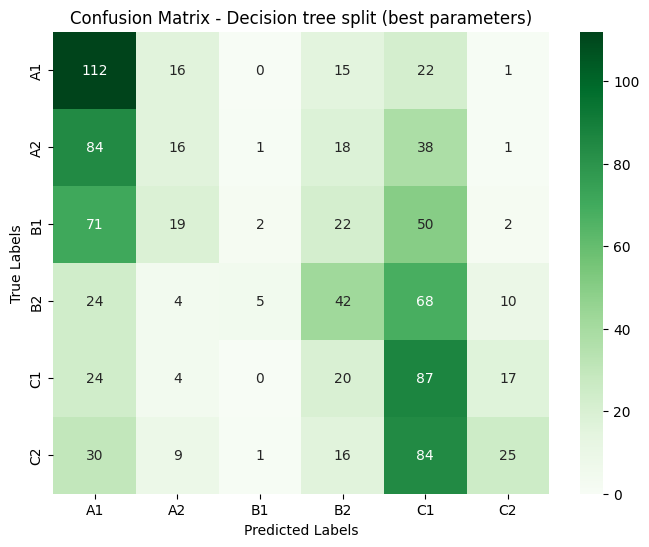

In [100]:
cm_DT_split_best = confusion_matrix(y_test, DT_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_DT_split_best, annot=True, fmt='d', cmap='Greens', xticklabels=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'], yticklabels=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Decision tree split (best parameters)')
plt.show()

In [81]:
# Accuracy for each class
TP_DT_split_best = np.diag(cm_DT_split_best) # True positives for each class

tot_DT_split_best = cm_DT_split_best.sum(axis=1) # Total samples for each class

indiv_DT_accuracy_best = TP_DT_split_best / tot_DT_split_best # Accuracy for each class

# Precision of each class
indiv_DT_precision_best = precision_score(y_test, DT_pred_best, average = None)

# Recall of each class
indiv_DT_recall_best = recall_score(y_test, DT_pred_best, average = None)

# F1 score of each class
indiv_DT_f1_best = f1_score(y_test, DT_pred_best, average = None)

# Visualize all results in a dataframe
DT_scores_best = pd.DataFrame([indiv_DT_accuracy_best, indiv_DT_precision_best, indiv_DT_recall_best, indiv_DT_f1_best], index=['Accuracy', 'Precision', 'Recall', 'F1 score'], columns=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'])
DT_scores_best

,A1,A2,B1,B2,C1,C2
Accuracy,0.674699,0.101266,0.012048,0.274510,0.572368,0.151515
Precision,0.324638,0.235294,0.222222,0.315789,0.249284,0.446429
Recall,0.674699,0.101266,0.012048,0.274510,0.572368,0.151515
F1 score,0.438356,0.141593,0.022857,0.293706,0.347305,0.226244


## Full dataset

In [82]:
# Initialize and fit the kNN classifier on the whole dataset
model_DT = DecisionTreeClassifier(criterion='entropy', max_depth=5)

model_DT.fit(x_full_tfidf, y)

# Make predictions on the test data
DT_pred_full = model_DT.predict(x_test_unlabelled_tfidf)

df_pred_DT_full = pd.DataFrame({'id': x_test_unlabelled.index, 'difficulty': DT_pred_full})
df_pred_DT_full

,id,difficulty
0,0,B2
1,1,C1
2,2,A2
3,3,A1
4,4,C1
...,...,...
1195,1195,C1
1196,1196,B2
1197,1197,C1
1198,1198,A1


In [83]:
# Export the dataframe as csv
df_pred_DT_full.to_csv("submission_DT.csv", index=False)

# Random Forest

## Split train-test dataset

In [84]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and fit the kNN classifier
model_RF = RandomForestClassifier()

model_RF.fit(x_train_tfidf, y_train)

# Make predictions on the test data
RF_pred = model_RF.predict(x_test_tfidf)

df_pred_RF = pd.DataFrame({'id': x_test.index, 'difficulty': RF_pred})
df_pred_RF

,id,difficulty
0,596,A1
1,3370,B2
2,3048,C2
3,2908,A2
4,8,A2
...,...,...
955,2968,A1
956,198,A2
957,2422,C2
958,1485,A1


In [85]:
# Get the accuracy
accuracy_RF_split = accuracy_score(y_test, RF_pred)
print("Accuracy of the Random Forest classifier for split train-test dataset:", accuracy_RF_split)

# Calculate Precision, Recall, F1-score with 'macro' average for simplicity
precision_RF_split = precision_score(y_test, RF_pred, average='macro')
print("Precision:", precision_RF_split)

recall_RF_split = recall_score(y_test, RF_pred, average='macro')
print("Recall:", recall_RF_split)

f1_RF_split = f1_score(y_test, RF_pred, average='macro')
print("F1-score:", f1_RF_split)

Accuracy of the Random Forest classifier for split train-test dataset: 0.390625
Precision: 0.3938655366062047
Recall: 0.388404434265397
F1-score: 0.3734535249001741


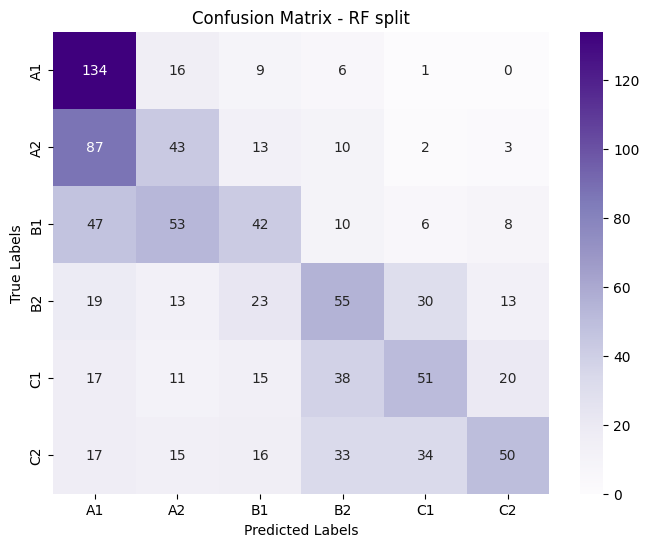

In [101]:
cm_RF_split = confusion_matrix(y_test, RF_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_RF_split, annot=True, fmt='d', cmap='Purples', xticklabels=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'], yticklabels=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - RF split')
plt.show()

In [87]:
# Accuracy for each class
TP_RF_split = np.diag(cm_RF_split) # True positives for each class

tot_RF_split = cm_RF_split.sum(axis=1) # Total samples for each class

indiv_RF_accuracy = TP_RF_split / tot_RF_split # Accuracy for each class

# Precision of each class
indiv_RF_precision = precision_score(y_test, RF_pred, average = None)

# Recall of each class
indiv_RF_recall = recall_score(y_test, RF_pred, average = None)

# F1 score of each class
indiv_RF_f1 = f1_score(y_test, RF_pred, average = None)

# Visualize all results in a dataframe
RF_scores = pd.DataFrame([indiv_RF_accuracy, indiv_RF_precision, indiv_RF_recall, indiv_RF_f1], index=['Accuracy', 'Precision', 'Recall', 'F1 score'], columns=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'])
RF_scores

,A1,A2,B1,B2,C1,C2
Accuracy,0.807229,0.272152,0.253012,0.359477,0.335526,0.303030
Precision,0.417445,0.284768,0.355932,0.361842,0.411290,0.531915
Recall,0.807229,0.272152,0.253012,0.359477,0.335526,0.303030
F1 score,0.550308,0.278317,0.295775,0.360656,0.369565,0.386100


In [88]:
# Loop over the model parameters to find the optimal parameters (for the best accuracy)
n_estimators = [1,3,5,7,9,11]
criterion = ['gini', 'entropy']
max_depth = [1,2,3,4,5,6,7,8,9,10]

for d in max_depth:
    for c in criterion:
        for n in n_estimators:
            model = RandomForestClassifier(n_estimators=n, criterion=c, max_depth=d, random_state=42)
            model.fit(x_train_tfidf, y_train)
            accuracy_RF = model.score(x_test_tfidf, y_test)
            print(f"Accuracy of Random Forest classifier for n_estimators = {n}, criterion = {c}, max_depth = {d}: {accuracy_RF}")

Accuracy of Random Forest classifier for n_estimators = 1, criterion = gini, max_depth = 1: 0.159375
Accuracy of Random Forest classifier for n_estimators = 3, criterion = gini, max_depth = 1: 0.22083333333333333
Accuracy of Random Forest classifier for n_estimators = 5, criterion = gini, max_depth = 1: 0.23645833333333333
Accuracy of Random Forest classifier for n_estimators = 7, criterion = gini, max_depth = 1: 0.23645833333333333
Accuracy of Random Forest classifier for n_estimators = 9, criterion = gini, max_depth = 1: 0.24895833333333334
Accuracy of Random Forest classifier for n_estimators = 11, criterion = gini, max_depth = 1: 0.2625
Accuracy of Random Forest classifier for n_estimators = 1, criterion = entropy, max_depth = 1: 0.159375
Accuracy of Random Forest classifier for n_estimators = 3, criterion = entropy, max_depth = 1: 0.22291666666666668
Accuracy of Random Forest classifier for n_estimators = 5, criterion = entropy, max_depth = 1: 0.23854166666666668
Accuracy of Rando

In [89]:
# Find the optimal parameters with hyperparameter tuning

# Define the parameters to test
param_grid_RF = {'n_estimators':np.arange(1,10), 'criterion':['gini', 'entropy'], 'max_depth':np.arange(1,10)}

# Initialize the Random Forest classifier, perform grid search, fit the model
model_RF_cv = RandomForestClassifier()
RF_cv = GridSearchCV(model_RF_cv, param_grid_RF, cv=7)
RF_cv.fit(x_train_tfidf, y_train)

# Get the best parameters
best_param_RF = RF_cv.best_params_
print('The best parameters are:', best_param_RF)


The best parameters are: {'criterion': 'gini', 'max_depth': 9, 'n_estimators': 9}


In [90]:
# Initialize and train the kNN classifier with the best parameters
model_RF_best = RandomForestClassifier(n_estimators=9, criterion='entropy', max_depth=9)

model_RF_best.fit(x_train_tfidf, y_train)

# Make predictions on the test data
RF_pred_best = model_RF_best.predict(x_test_tfidf)

df_pred_RF_best = pd.DataFrame({'id': x_test.index, 'difficulty': RF_pred_best})
df_pred_RF_best

,id,difficulty
0,596,A1
1,3370,C1
2,3048,C1
3,2908,B1
4,8,A1
...,...,...
955,2968,A1
956,198,C2
957,2422,C2
958,1485,C2


In [91]:
# Get the accuracy
accuracy_RF_split_best = accuracy_score(y_test, RF_pred_best)
print("Accuracy of the Random Forest model with the best parameters, for split train-test dataset:", accuracy_RF_split_best)

# Calculate Precision, Recall, F1-score with 'macro' average for simplicity
precision_RF_split_best = precision_score(y_test, RF_pred_best, average='macro')
print("Precision:", precision_RF_split_best)

recall_RF_split_best = recall_score(y_test, RF_pred_best, average='macro')
print("Recall:", recall_RF_split_best)

f1_RF_split_best = f1_score(y_test, RF_pred_best, average='macro')
print("F1-score:", f1_RF_split_best)

Accuracy of the Random Forest model with the best parameters, for split train-test dataset: 0.3125
Precision: 0.300879368521326
Recall: 0.3100937735216749
F1-score: 0.2903825476812158


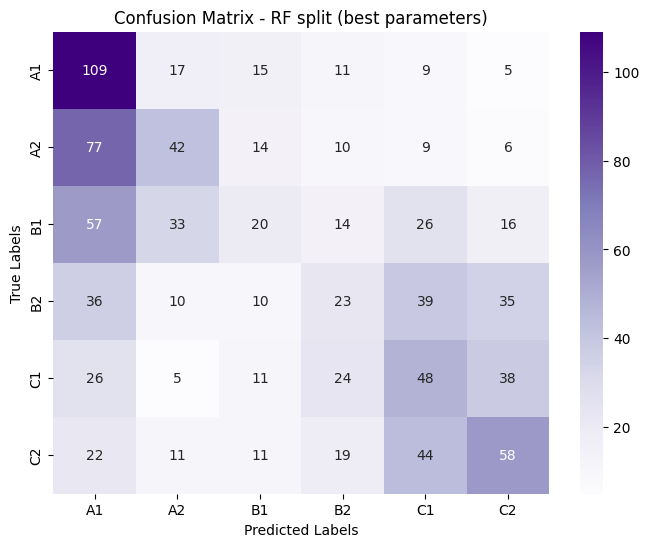

In [102]:
cm_RF_split_best = confusion_matrix(y_test, RF_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_RF_split_best, annot=True, fmt='d', cmap='Purples', xticklabels=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'], yticklabels=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - RF split (best parameters)')
plt.show()

In [93]:
# Accuracy for each class
TP_RF_split_best = np.diag(cm_RF_split_best) # True positives for each class

tot_RF_split_best = cm_RF_split_best.sum(axis=1) # Total samples for each class

indiv_RF_accuracy_best = TP_RF_split_best / tot_RF_split_best # Accuracy for each class

# Precision of each class
indiv_RF_precision_best = precision_score(y_test, RF_pred_best, average = None)

# Recall of each class
indiv_RF_recall_best = recall_score(y_test, RF_pred_best, average = None)

# F1 score of each class
indiv_RF_f1_best = f1_score(y_test, RF_pred_best, average = None)

# Visualize all results in a dataframe
RF_scores_best = pd.DataFrame([indiv_RF_accuracy_best, indiv_RF_precision_best, indiv_RF_recall_best, indiv_RF_f1_best], index=['Accuracy', 'Precision', 'Recall', 'F1 score'], columns=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'])
RF_scores_best

,A1,A2,B1,B2,C1,C2
Accuracy,0.656627,0.265823,0.120482,0.150327,0.315789,0.351515
Precision,0.333333,0.355932,0.246914,0.227723,0.274286,0.367089
Recall,0.656627,0.265823,0.120482,0.150327,0.315789,0.351515
F1 score,0.442191,0.304348,0.161943,0.181102,0.293578,0.359133


## Full dataset

In [94]:
# Initialize and fit the kNN classifier on the whole dataset
model_RF = RandomForestClassifier(n_estimators=9, criterion='entropy', max_depth=9)

model_RF.fit(x_full_tfidf, y)

# Make predictions on the test data
RF_pred_full = model_RF.predict(x_test_unlabelled_tfidf)

df_pred_RF_full = pd.DataFrame({'id': x_test_unlabelled.index, 'difficulty': RF_pred_full})
df_pred_RF_full

,id,difficulty
0,0,A1
1,1,B2
2,2,A1
3,3,A1
4,4,C2
...,...,...
1195,1195,C2
1196,1196,A2
1197,1197,C2
1198,1198,A2


In [95]:
# Export the dataframe as csv
df_pred_RF_full.to_csv("submission_RF.csv", index=False)

# Export Model

In [96]:
import pickle

# Export 'model_LR'
with open('model_LR.pkl', 'wb') as file:
    pickle.dump((model_LR, vectorizer), file)